In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/cement_strength_reg/Concrete_Data.xls")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
df.shape

(1030, 9)

- Cement (component 1)(kg in a m^3 mixture)

- Blast Furnace Slag (component 2)(kg in a m^3 mixture)

- Fly Ash (component 3)(kg in a m^3 mixture)

- Water  (component 4)(kg in a m^3 mixture)

- Superplasticizer (component 5)(kg in a m^3 mixture)

- Coarse Aggregate  (component 6)(kg in a m^3 mixture)

- Fine Aggregate (component 7)(kg in a m^3 mixture)

- Age (day)

- Concrete compressive strength(MPa, megapascals)

In [7]:
#changing column name

col = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength ']

df.columns = col

In [8]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast_Furnace_Slag              1030 non-null   float64
 2   Fly_Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse_Aggregate                1030 non-null   float64
 6   Fine_Aggregate                  1030 non-null   float64
 7   Age                             1030 non-null   int64  
 8   Concrete_compressive_strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
#check for null values

df.isnull().sum()

Cement                            0
Blast_Furnace_Slag                0
Fly_Ash                           0
Water                             0
Superplasticizer                  0
Coarse_Aggregate                  0
Fine_Aggregate                    0
Age                               0
Concrete_compressive_strength     0
dtype: int64

In [12]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

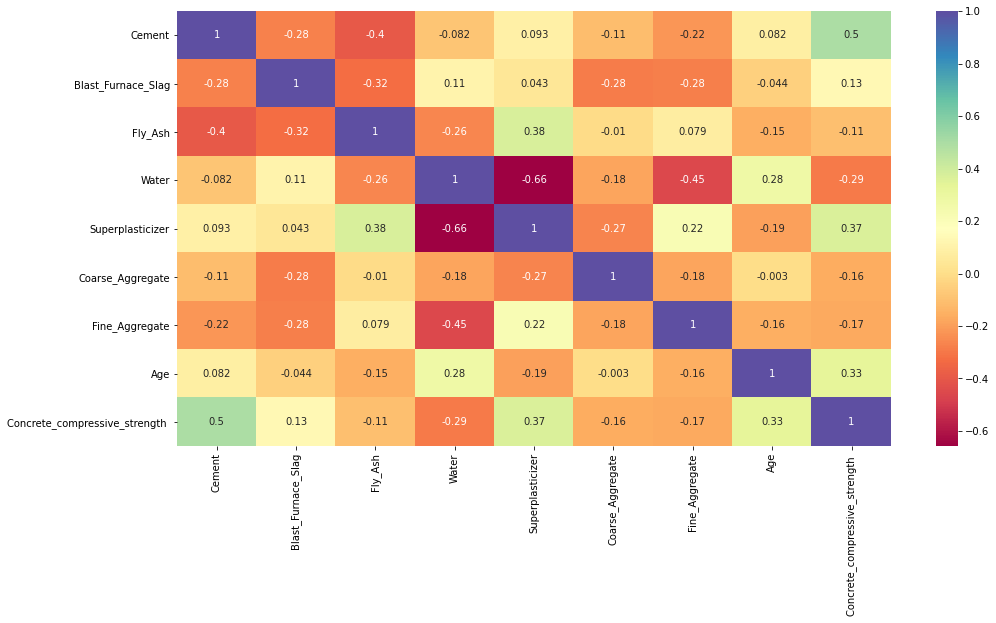

In [14]:
#plot the correlation matrix
plt.figure(figsize=(16,8))

sns.heatmap(df.corr(),cmap='Spectral', annot = True)

In [15]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength '],
      dtype='object')

# Scatter Plot Between Independent & Dependent Variable

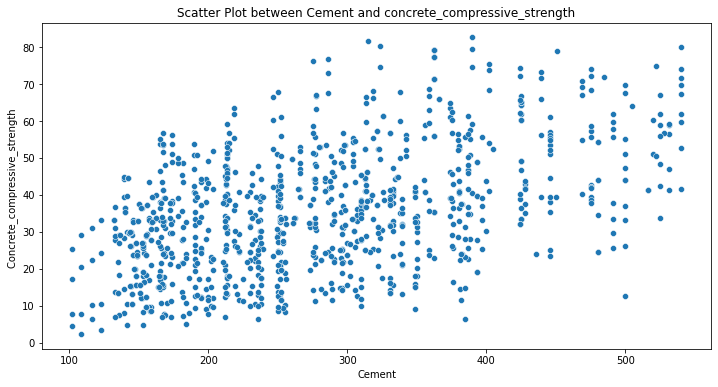

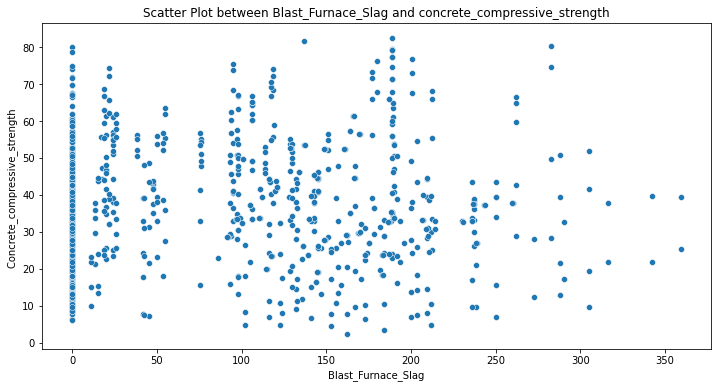

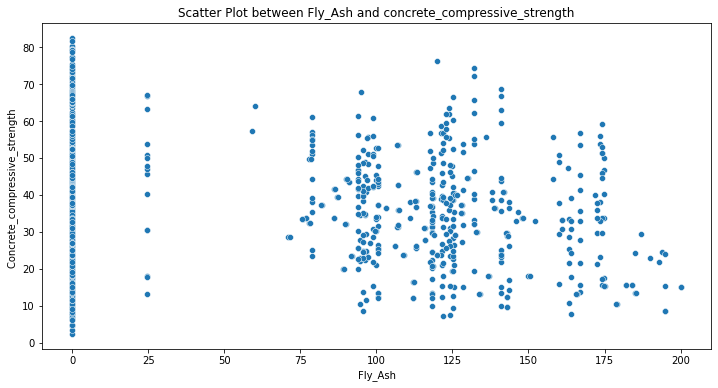

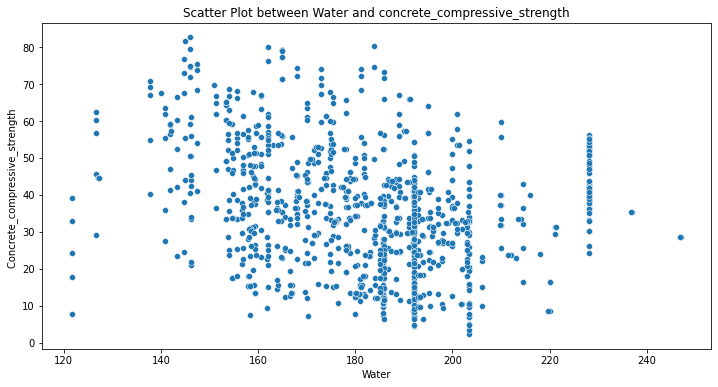

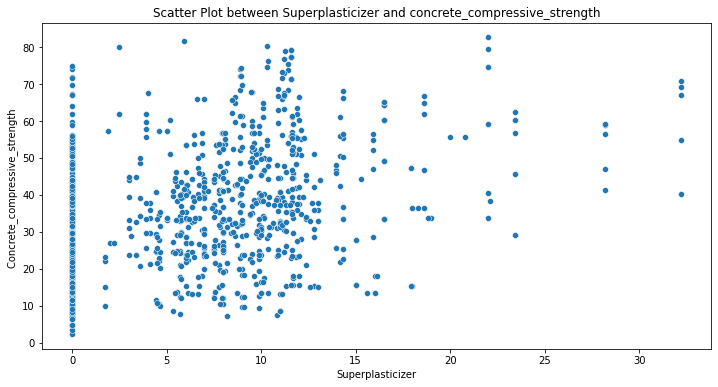

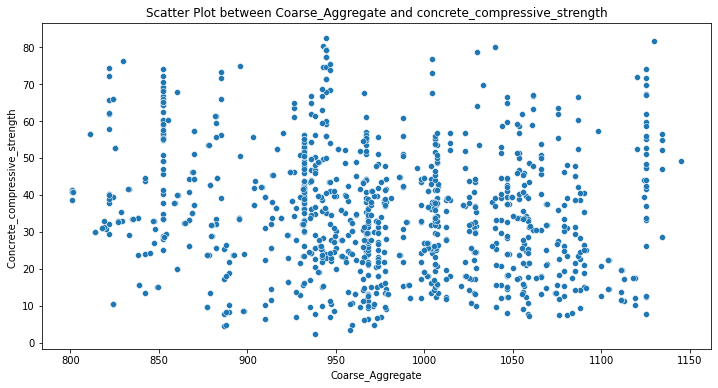

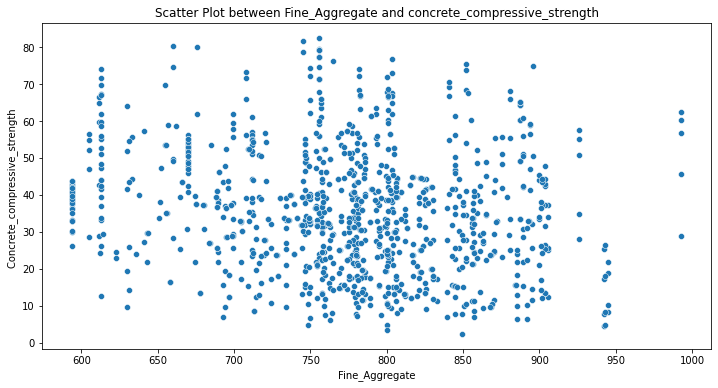

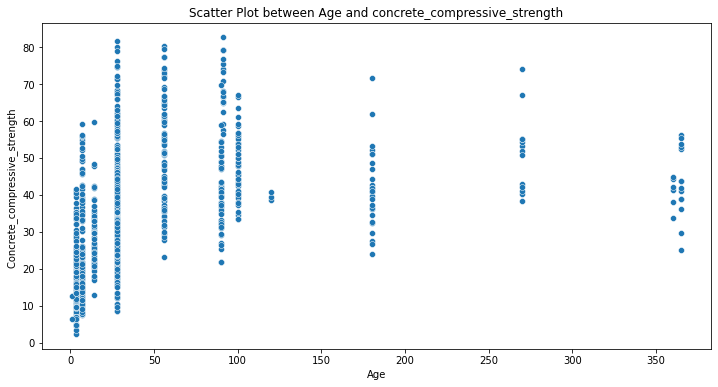

In [16]:
col = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

for i in col:
  plt.figure(figsize=(12,6))
  
  sns.scatterplot(df[i], df["Concrete_compressive_strength "])
  plt.title(f"Scatter Plot between {i} and concrete_compressive_strength")

## Variance Influence Factor

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Superplasticizer', 'Fine_Aggregate', 'Age', 'Coarse_Aggregate', 'Water',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0              Cement  15.468620
1  Blast_Furnace_Slag   3.330359
2             Fly_Ash   4.148893
3    Superplasticizer   5.472391
4      Fine_Aggregate  72.795397
5                 Age   1.699430
6    Coarse_Aggregate  84.959460
7               Water  82.150840


In [18]:
# the independent variables set
X = df[['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Superplasticizer', 'Fine_Aggregate', 'Age']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0              Cement   9.424557
1  Blast_Furnace_Slag   2.081062
2             Fly_Ash   2.943828
3    Superplasticizer   2.939740
4      Fine_Aggregate  14.219531
5                 Age   1.577358


# Checking For Outliers 

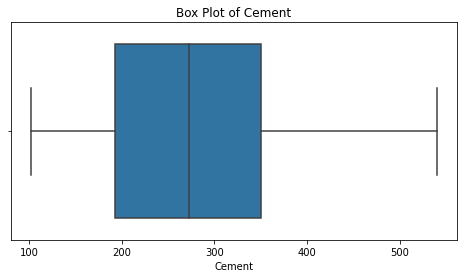

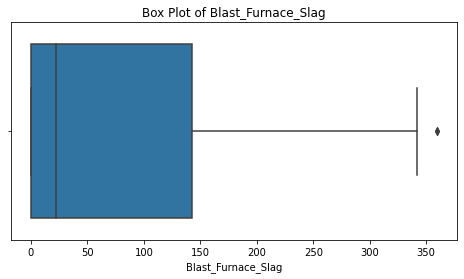

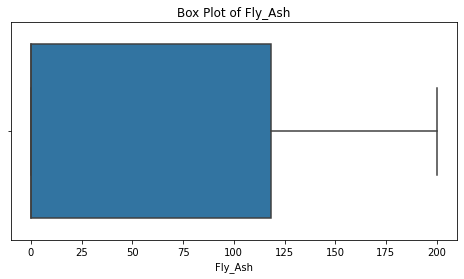

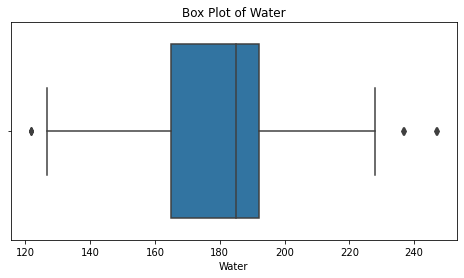

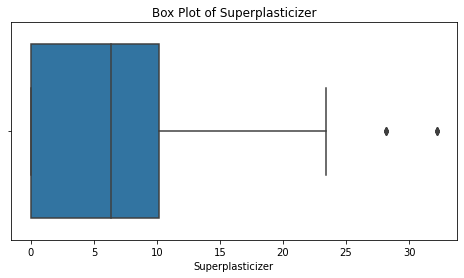

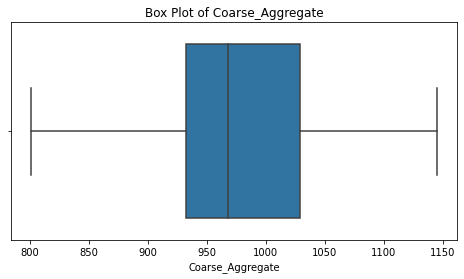

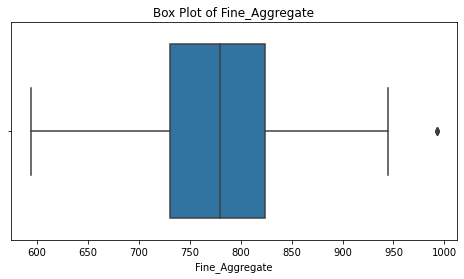

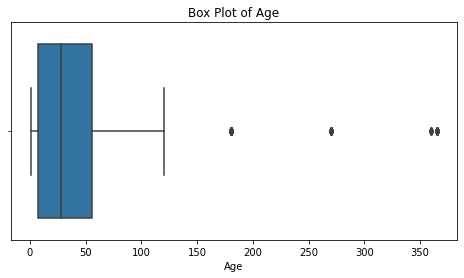

In [19]:
for i in col:
  plt.figure(figsize=(8,4))
  sns.boxplot(df[i])
  plt.title(f"Box Plot of {i}")

# Distribution Plots

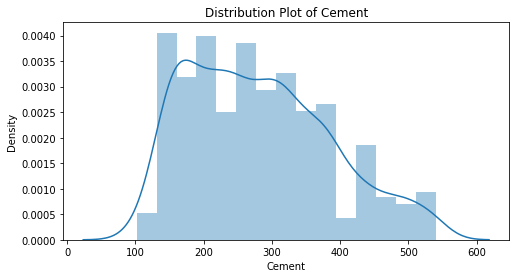

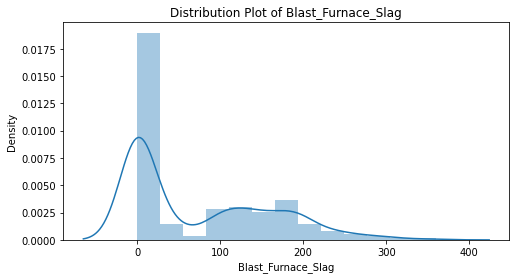

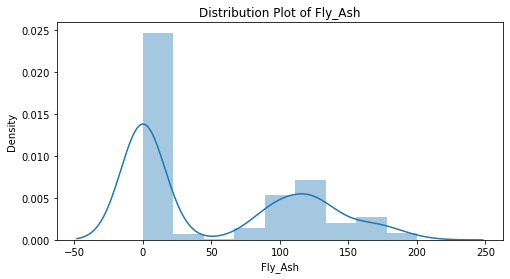

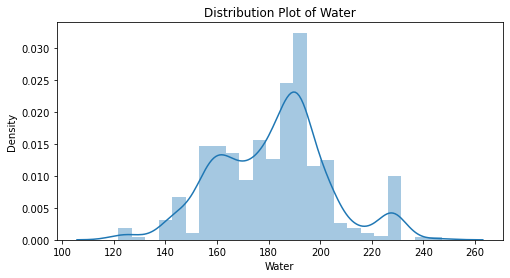

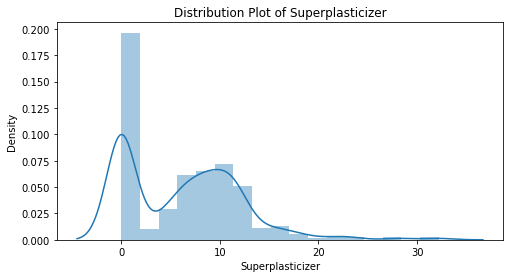

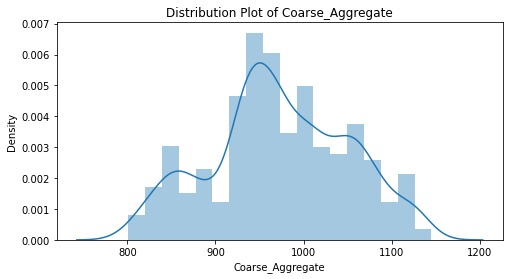

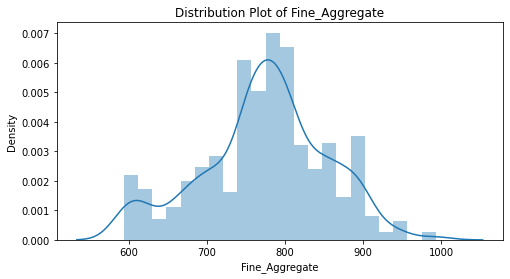

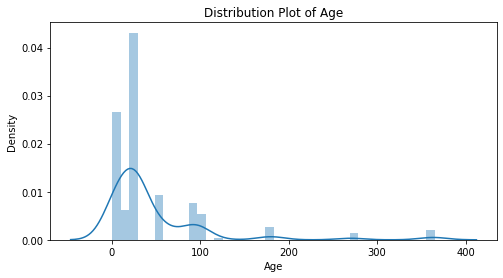

In [20]:
for i in col:
  plt.figure(figsize=(8,4))
  sns.distplot(df[i])
  plt.title(f"Distribution Plot of {i}")

# Re-scalling Data

## Normalization

In [21]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [22]:
X = df.drop("Concrete_compressive_strength ", axis = 1)
Y = df["Concrete_compressive_strength "]

In [23]:
from sklearn import preprocessing

# normalize the data attributes
X_scaled = preprocessing.normalize(X)

In [24]:
X_scaled

array([[0.39624448, 0.        , 0.        , ..., 0.76313751, 0.49603938,
        0.02054601],
       [0.39293409, 0.        , 0.        , ..., 0.7676768 , 0.49189527,
        0.02037436],
       [0.27357162, 0.11724498, 0.        , ..., 0.76682331, 0.48872645,
        0.22214838],
       ...,
       [0.12141129, 0.11397127, 0.08878967, ..., 0.72961238, 0.63771588,
        0.02289237],
       [0.1222549 , 0.14346317, 0.        , ..., 0.76042395, 0.60620297,
        0.02151563],
       [0.21646863, 0.08338481, 0.06496548, ..., 0.71727531, 0.63181625,
        0.02323159]])

In [25]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
X_scaled.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,0.396244,0.000000,0.0,0.118873,0.001834,0.763138,0.496039,0.020546
1,0.392934,0.000000,0.0,0.117880,0.001819,0.767677,0.491895,0.020374
2,0.273572,0.117245,0.0,0.187592,0.000000,0.766823,0.488726,0.222148
3,0.268151,0.114922,0.0,0.183875,0.000000,0.751630,0.479043,0.294361
4,0.145536,0.097024,0.0,0.140700,0.000000,0.716983,0.604936,0.263812


In [27]:
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete_compressive_strength , dtype: float64

## Standardization

In [28]:
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [29]:
from sklearn import preprocessing

# standardize the data attributes
X_scaled_std = preprocessing.scale(X)

In [30]:
X_scaled_std

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [31]:
X_scaled_std = pd.DataFrame(X_scaled_std, columns=X.columns)

In [32]:
X_scaled_std.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


# Train-Test_split

### First i am going to take normalized data then will take standardized data.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [35]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(690, 8) (340, 8) (690,) (340,)


# Use SGDRegressor() to build a linear model


In [36]:
from sklearn.linear_model import SGDRegressor 

lin_model = SGDRegressor()

#We fit our model with train data
lin_model.fit(X_train, Y_train)

# We use predict() to predict our values
lin_model_predictions = lin_model.predict(X_test)

# we check the coefficient of determination (R2 score) with score()
print(lin_model.score(X_test,Y_test))

0.38913624538733615


In [37]:
#Mean Square Error

#We check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, lin_model_predictions)
rmse = np.sqrt(mse)
print(rmse)

13.059971730701408


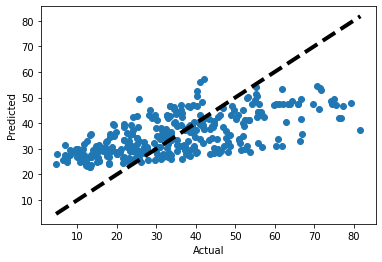

In [38]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, lin_model_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()



## Durbin-Watson test:

### which is used to detect the presence of autocorrelation in the residuals of a regression. This test uses the following hypotheses:

- H0 (null hypothesis): There is no correlation among the residuals.

- HA (alternative hypothesis): The residuals are autocorrelated.

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:

#### A test statistic of 2 indicates no serial correlation.

- The closer the test statistics is to 0, the more evidence of positive serial correlation.
- The closer the test statistics is to 4, the more evidence of negative serial correlation.

##### As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.

In [39]:
from statsmodels.stats.stattools import durbin_watson

residuals = Y_test - lin_model_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

2.2458761284736855

##### This static (2.246) is considered normal.

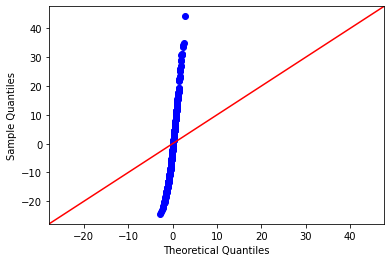

In [40]:
#Q-Q plot for residuals

import statsmodels.api as sm
import pylab as py

residuals = Y_test - lin_model_predictions
sm.qqplot(residuals, line ='45')
py.show()

# Create a model with grid search
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [41]:
import warnings 

warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

from sklearn.model_selection import GridSearchCV

# Grid search - this will take about some minute depending on system configuration
param_grid = {
    'alpha': 10.0 ** -np.arange(1,7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    
}
grid_lin_model = GridSearchCV(lin_model, param_grid)
grid_lin_model.fit(X_train,Y_train)
print("Best Score:" +str(grid_lin_model.best_score_))

Best Score:0.5387347201309824


In [42]:
grid_lin_model.best_params_

{'alpha': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'epsilon_insensitive',
 'penalty': 'l1'}

In [43]:
grid_lin_model.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='epsilon_insensitive', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [44]:
grid_model = grid_lin_model.best_estimator_

In [45]:
grid_predictions = grid_model.predict(X_test)

In [46]:
#coefficient of determination (R2 score) with score()
print(grid_model.score(X_test,Y_test))

0.5496583038521767


In [47]:
#Mean Square Error

#We check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, grid_predictions)
rmse = np.sqrt(mse)
print(rmse)

11.213498721727467


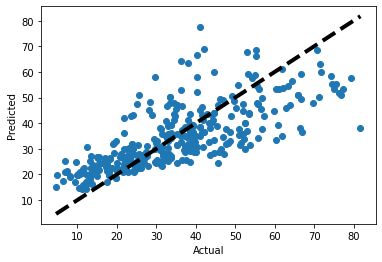

In [48]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, grid_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [49]:
#Durbin_watson_test
from statsmodels.stats.stattools import durbin_watson

residuals = Y_test - grid_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

2.22711811384752

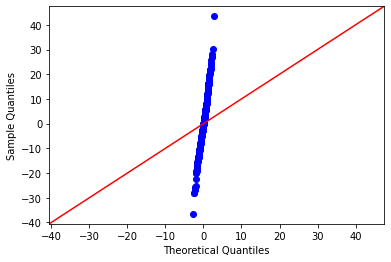

In [50]:
#Q-Q plot for residuals

import statsmodels.api as sm
import pylab as py

residuals = Y_test - grid_predictions
sm.qqplot(residuals, line ='45')
py.show()

# Create a model with RandomizedSearchCV


In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'alpha': 10.0 ** -np.arange(1,7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    
}
random_lin_model = RandomizedSearchCV(lin_model, param_grid)
random_lin_model.fit(X_train,Y_train)
print("Best Score:" +str(random_lin_model.best_score_))

Best Score:0.3779217147195991


In [52]:
random_lin_model.best_params_

{'alpha': 1e-05,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'penalty': 'l2'}

In [53]:
random_lin_model.best_estimator_

SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [54]:
random_model = random_lin_model.best_estimator_

In [55]:
random_predictions = random_model.predict(X_test)

In [56]:
#coefficient of determination (R2 score) with score()
print(random_model.score(X_test,Y_test))

0.3913101863892738


In [57]:
#Mean Square Error

#We check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, random_predictions)
rmse = np.sqrt(mse)
print(rmse)

13.03671211440753


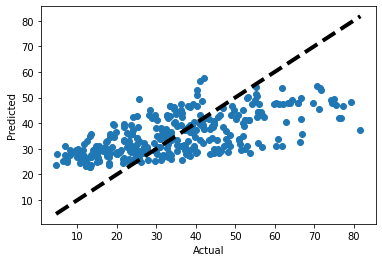

In [58]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, random_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [59]:
#Durbin_watson_test
from statsmodels.stats.stattools import durbin_watson

residuals = Y_test - random_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

2.247692696131492

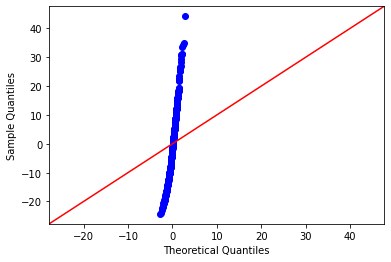

In [60]:
#Q-Q plot for residuals

import statsmodels.api as sm
import pylab as py

residuals = Y_test - random_predictions
sm.qqplot(residuals, line ='45')
py.show()

### All these above created models are not good enough to consider.
### Now i am going to drop those columns for which i was getting large value of VIF(Variance Influence Factor) and will see if we able to improve model performance or not.

In [61]:
X_scaled.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,0.396244,0.000000,0.0,0.118873,0.001834,0.763138,0.496039,0.020546
1,0.392934,0.000000,0.0,0.117880,0.001819,0.767677,0.491895,0.020374
2,0.273572,0.117245,0.0,0.187592,0.000000,0.766823,0.488726,0.222148
3,0.268151,0.114922,0.0,0.183875,0.000000,0.751630,0.479043,0.294361
4,0.145536,0.097024,0.0,0.140700,0.000000,0.716983,0.604936,0.263812


In [62]:
input = X_scaled.copy()

In [63]:
# Dropping water and Coarse_Aggregate feature 

input.drop("Water", axis = 1, inplace = True)
input.drop("Coarse_Aggregate", axis = 1, inplace = True)

In [64]:
input.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Superplasticizer,Fine_Aggregate,Age
0,0.396244,0.000000,0.0,0.001834,0.496039,0.020546
1,0.392934,0.000000,0.0,0.001819,0.491895,0.020374
2,0.273572,0.117245,0.0,0.000000,0.488726,0.222148
3,0.268151,0.114922,0.0,0.000000,0.479043,0.294361
4,0.145536,0.097024,0.0,0.000000,0.604936,0.263812


In [65]:
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete_compressive_strength , dtype: float64

In [66]:
# Train-Test-Split
X_train, X_test, Y_train, Y_test = train_test_split(input, Y, test_size=0.20, random_state=101)

In [67]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(824, 6) (206, 6) (824,) (206,)


In [68]:
# Creating linear modle with the help of RandomizedSearchCV

param_grid = {
    'alpha': 10.0 ** -np.arange(1,7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling']}
    
random_lin_model = RandomizedSearchCV(lin_model, param_grid)
random_lin_model.fit(X_train,Y_train)
print("Best Score:" +str(random_lin_model.best_score_))

Best Score:0.4206673481117865


In [69]:
random_lin_model.best_params_

{'alpha': 0.0001,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'penalty': 'l2'}

In [70]:
random_lin_model.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [71]:
random_model = random_lin_model.best_estimator_

In [72]:
random_predictions = random_model.predict(X_test)

In [73]:
#R2 score
random_model.score(X_test,Y_test)

0.435896596541256

In [74]:
#Mean Square Error

mse = mean_squared_error(Y_test, random_predictions)
rmse = np.sqrt(mse)
print(rmse)

13.37328380042874


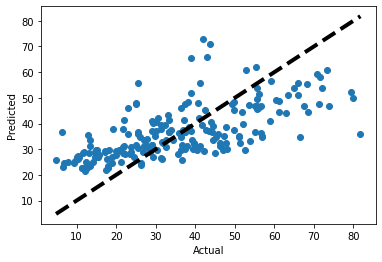

In [75]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, random_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [76]:
#Durbin_watson_test

residuals = Y_test - random_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

1.942619117173957

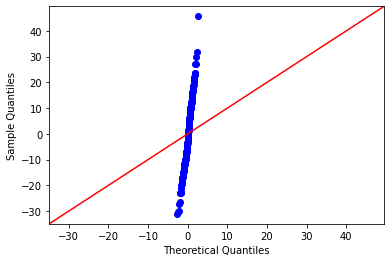

In [77]:
#Q-Q plot for residuals

residuals = Y_test - random_predictions
sm.qqplot(residuals, line ='45')
py.show()

# Xgboost Model Creation

In [78]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train,Y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

[04:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  17.007119


In [79]:
#R2 Score
xgb_r.score(X_test,Y_test)

0.08768654160040135

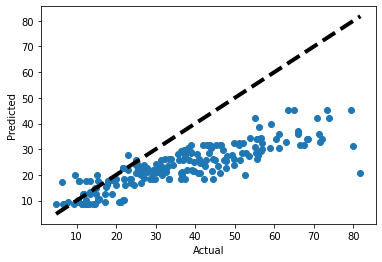

In [80]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [81]:
#Durbin_watson_test

residuals = Y_test - pred
#perform Durbin-Watson test
durbin_watson(residuals)

0.7945255827559794

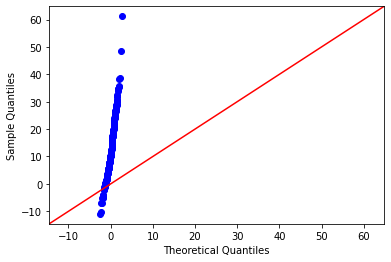

In [82]:
#Q-Q plot for residuals

residuals = Y_test - pred
sm.qqplot(residuals, line ='45')
py.show()

# XgBoost using RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg

In [84]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}


regressor = xg.XGBRegressor() 


random_search=RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [85]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [86]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 15,
 'min_child_weight': 7}

In [87]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [88]:
random_model = random_search.best_estimator_

In [89]:
random_predictions = random_model.predict(X_test)

In [90]:
#R2 score
random_model.score(X_test,Y_test)

0.8876670309174584

In [91]:
#Mean Square Error

mse = mean_squared_error(Y_test, random_predictions)
rmse = np.sqrt(mse)
print(rmse)

5.967773340419571


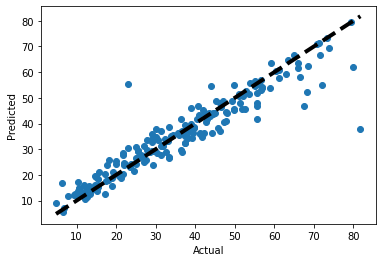

In [92]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, random_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [93]:
#Durbin_watson_test

residuals = Y_test - random_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

1.8452454046322104

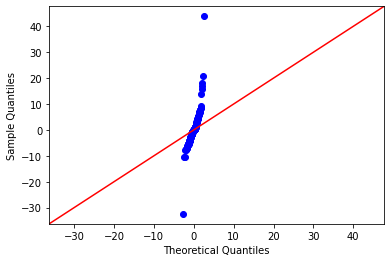

In [94]:
#Q-Q plot for residuals

residuals = Y_test - random_predictions
sm.qqplot(residuals, line ='45')
py.show()

In [95]:
X_test.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Superplasticizer,Fine_Aggregate,Age
605,0.175244,0.000000,0.000000,0.000000,0.657164,0.002228
572,0.165872,0.110581,0.000000,0.000000,0.559140,0.005259
920,0.110068,0.131110,0.101975,0.008093,0.618323,0.022661
921,0.122342,0.000000,0.112870,0.007104,0.685114,0.022100
74,0.273691,0.068459,0.000000,0.017078,0.724441,0.002190


In [96]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Superplasticizer,Fine_Aggregate,Age
962,0.111373,0.000000,0.102758,0.008538,0.624163,0.021536
142,0.322159,0.080578,0.000000,0.014099,0.609221,0.042449
1011,0.239072,0.100272,0.078137,0.007656,0.579081,0.023300
547,0.253548,0.000000,0.000000,0.000000,0.641561,0.005330
299,0.216776,0.000000,0.071808,0.007026,0.645811,0.002240


# Deployment Related Work

In [97]:
X = df.drop("Concrete_compressive_strength ", axis = 1)
Y = df["Concrete_compressive_strength "]

In [98]:
X

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [99]:
from sklearn import preprocessing

# normalize the data attributes
X_scaled = preprocessing.normalize(X)

In [100]:
X_scaled

array([[0.39624448, 0.        , 0.        , ..., 0.76313751, 0.49603938,
        0.02054601],
       [0.39293409, 0.        , 0.        , ..., 0.7676768 , 0.49189527,
        0.02037436],
       [0.27357162, 0.11724498, 0.        , ..., 0.76682331, 0.48872645,
        0.22214838],
       ...,
       [0.12141129, 0.11397127, 0.08878967, ..., 0.72961238, 0.63771588,
        0.02289237],
       [0.1222549 , 0.14346317, 0.        , ..., 0.76042395, 0.60620297,
        0.02151563],
       [0.21646863, 0.08338481, 0.06496548, ..., 0.71727531, 0.63181625,
        0.02323159]])

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)

In [102]:
#XGBoost Model

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}


regressor = xg.XGBRegressor() 


random_search=RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [103]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5}

In [104]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [105]:
random_model = random_search.best_estimator_

In [106]:
random_predictions = random_model.predict(X_test)

In [107]:
#R2 Score

random_model.score(X_test,Y_test)

0.9041103065213565

In [108]:
#Mean Square Error

mse = mean_squared_error(Y_test, random_predictions)
rmse = np.sqrt(mse)
print(rmse)

4.970810854635128


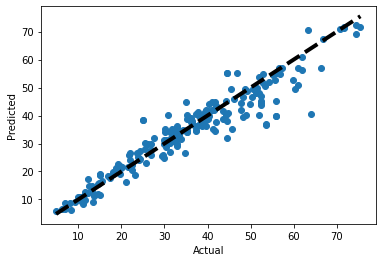

In [109]:
#Actual vs Predicted Plot

fig, ax = plt.subplots()
ax.scatter(Y_test, random_predictions)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [110]:
#Durbin_watson_test

residuals = Y_test - random_predictions
#perform Durbin-Watson test
durbin_watson(residuals)

1.9774530068665086

# Creating pickle file for random_model

In [112]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(random_model, pickle_out)
pickle_out.close()

In [111]:
random_model.predict([[0.175,0.00,0.00,0.00,0.65,0.0028,0,0]])

array([23.421356], dtype=float32)

### Input for model:

- Cement	
- Blast_Furnace_Slag
- Fly_Ash	
- Water	
- Superplasticizer	
- Coarse_Aggregate	
- Fine_Aggregate	Age